In [4]:
# Dataset Preparation:
# ▪ Load the California Housing Dataset using fetch_california_housing() from
# sklearn.datasets.
# ▪ Preprocess the data using StandardScaler.
# ▪ Split the data into training and test sets.
# ▪ Convert the data into PyTorch tensors.
# 2. Neural Network Definition:
# ▪ Replicate the neural network used for the Diabetes Dataset regression task.
# ▪ Input layer size = number of features (8 for California Housing Dataset).
# 3. Training:
# ▪ Use MSELoss as the loss function and Adam as the optimizer.
# ▪ Train for 100 epochs and log the loss every 10 epochs.
# 4. Evaluation:
# ▪ Calculate mean squared error and R-squared.
# ▪ Visualize predictions vs. true valuesimport torch


Epoch [10/100], Loss: 0.9614
Epoch [20/100], Loss: 0.7247
Epoch [30/100], Loss: 0.5355
Epoch [40/100], Loss: 0.4539
Epoch [50/100], Loss: 0.4202
Epoch [60/100], Loss: 0.4024
Epoch [70/100], Loss: 0.3907
Epoch [80/100], Loss: 0.3818
Epoch [90/100], Loss: 0.3737
Epoch [100/100], Loss: 0.3669
Mean Squared Error: 0.3815
R-squared: 0.7089


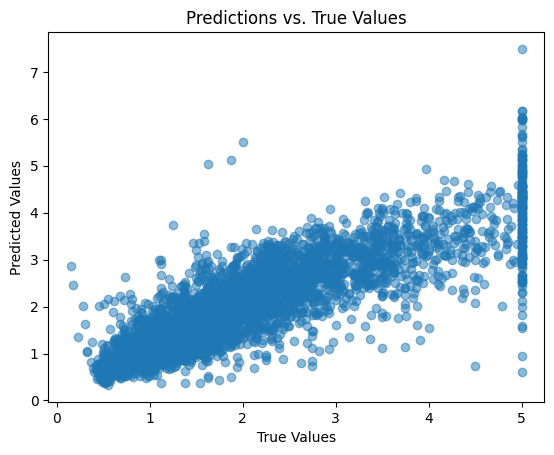

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Preparation
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 2. Neural Network Definition
class HousingRegressor(nn.Module):
    def __init__(self):
        super(HousingRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = HousingRegressor()

# 3. Training
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.show()


In [ ]:
# Classification Task:
# • Objective: Classify houses into "low value" or "high value" based on a threshold (e.g.,
# median house value).
# • Steps:
# 1. Dataset Preparation:
# ▪ Use the same California Housing Dataset but create binary labels:
# ▪ Label houses as 1 (high value) or 0 (low value) based on the
# median value threshold.
# ▪ Preprocess and split the data as in the regression task.
# ▪ Convert the data into PyTorch tensors.
# 2. Neural Network Definition:
# ▪ Replicate the neural network used for the Diabetes Dataset classification
# task.
# ▪ Input layer size = number of features (8 for California Housing Dataset).
# 3. Training:
# ▪ Use CrossEntropyLoss as the loss function and Adam as the optimizer.
# ▪ Train for 100 epochs and log the loss every 10 epochs.
# 4. Evaluation:
# ▪ Calculate metrics such as accuracy, precision, recall, and F1-score.
# ▪ Generate a confusion matrix and visualize it.

Epoch [10/100], Loss: 0.5260
Epoch [20/100], Loss: 0.4788
Epoch [30/100], Loss: 0.4613
Epoch [40/100], Loss: 0.4508
Epoch [50/100], Loss: 0.4433
Epoch [60/100], Loss: 0.4383
Epoch [70/100], Loss: 0.4351
Epoch [80/100], Loss: 0.4329
Epoch [90/100], Loss: 0.4311
Epoch [100/100], Loss: 0.4297
Accuracy: 0.8735
Precision: 0.8695
Recall: 0.8771
F1-score: 0.8733


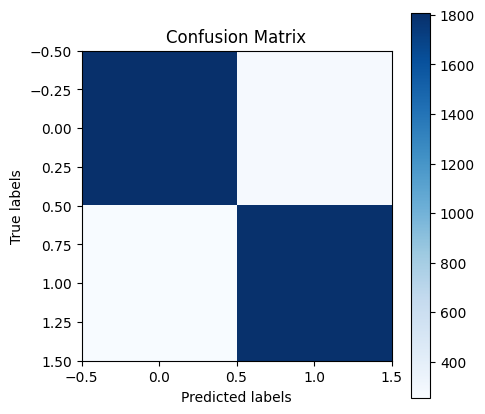

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Preparation
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Convert target to binary labels based on median value
median_value = np.median(y)
y = (y > median_value).astype(int)  # 1 if high value, 0 if low value

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. Neural Network Definition
class HousingClassifier(nn.Module):
    def __init__(self):
        super(HousingClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = HousingClassifier()

# 3. Training
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_probs, dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualization
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Wrap-Up
# 1. Key Takeaways:
# • Hands-on experience building feedforward neural networks for regression and
# classification tasks.
# • Understanding evaluation metrics like MSE, R-squared, accuracy, precision, and recall.
# • Familiarity with GitHub for professional documentation.
# 2. Survey:
# • Students complete a short survey reflecting on:
# o Challenges faced.
# o Lessons learned.
# o Suggestions for improving future sessions.
